# 서울시 생활인구
## 서울 생활인구 현황 (2022.10.05. 기준)
### url: https://data.seoul.go.kr/dataVisual/seoul/seoulLivingPopulation.do
### 서울시 생활인구란? 
    - 서울시와 KT가 공공빅데이터와 통신데이터를 이용하여 추계한 서울의 특정지역, 특정시점에 존재하는 모든 인구

#### 데이터: 행정동 단위 서울 생활인구(내국인)
    - url: https://data.seoul.go.kr/dataList/OA-14979/F/1/datasetView.do
    - 설명: 서울시가 보유한 공공데이터와 통신데이터로 측정한 특정시점에 서울의 특정 지역에 존재하는 인구 중 내국인

<!-- <br> -->



※ 개인정보 비 식별화를 위하여 ‘3명’ 이하인 경우 “ * ” 처리


In [1]:
import os
import glob
import pandas as pd
import numpy as np

In [2]:
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point

In [3]:
import matplotlib.pyplot  as  plt
from matplotlib  import  rc

rc('font', family='AppleGothic') # 한글 사용가능
plt.rcParams['axes.unicode_minus'] = False # 마이너스 사용가능

In [4]:
import plotly.express as px

In [5]:
df_dong = pd.read_csv("서울_월별_일일평균생활인구.csv", index_col=0)

In [6]:
pd.options.display.float_format = '{:,.0f}'.format

In [7]:
df_dong[df_dong['통계청행정동코드']==1101053]

,시도명,시군구명,행정동명,통계청행정동코드,행자부행정동코드,월,주말여부,일일평균생활인구,10세 이하,10대,20대,30대,40대,50대,60대,70세 이상
24,서울,종로구,사직동,1101053,11110530,10,주말,"417,616","20,090","26,607","67,369","80,285","71,716","62,209","43,860","45,480"
25,서울,종로구,사직동,1101053,11110530,10,평일,"568,860","15,295","22,774","83,847","129,050","124,486","91,580","52,734","49,094"
26,서울,종로구,사직동,1101053,11110530,11,주말,"451,526","20,965","29,124","77,283","87,186","77,373","67,114","46,085","46,396"
27,서울,종로구,사직동,1101053,11110530,11,평일,"615,749","15,446","23,978","94,450","141,989","135,929","97,982","55,888","50,086"
28,서울,종로구,사직동,1101053,11110530,12,주말,"407,185","19,677","26,450","63,431","76,486","71,895","62,108","43,266","43,872"
29,서울,종로구,사직동,1101053,11110530,12,평일,"584,145","16,156","24,839","88,410","131,647","127,051","93,906","53,369","48,767"
30,서울,종로구,사직동,1101053,11110530,1,주말,"386,160","19,070","25,017","58,635","69,888","68,094","59,575","41,816","44,065"
31,서울,종로구,사직동,1101053,11110530,1,평일,"564,269","17,058","23,421","84,350","127,000","123,235","90,359","51,122","47,725"
32,서울,종로구,사직동,1101053,11110530,2,주말,"392,941","18,979","25,119","62,325","73,526","67,858","59,053","41,965","44,115"
33,서울,종로구,사직동,1101053,11110530,2,평일,"538,047","16,640","23,451","80,864","117,340","116,217","86,532","49,640","47,362"


# 총 일평균 생활인구

## 행정동별 일일평균 생활인구

In [62]:
df_dong_day = df_dong.pivot_table("일일평균생활인구", index=["시군구명","행정동명"],aggfunc = 'mean').sort_values(by=["시군구명"],ascending=False)
df_dong_day.reset_index(inplace=True)
df_dong_day

,시군구명,행정동명,일일평균생활인구
0,중랑구,중화2동,"604,708"
1,중랑구,면목본동,"656,497"
2,중랑구,망우3동,"295,430"
3,중랑구,망우본동,"922,252"
4,중랑구,면목2동,"493,121"
...,...,...,...
419,강남구,일원1동,"388,943"
420,강남구,일원2동,"393,842"
421,강남구,일원본동,"592,415"
422,강남구,청담동,"1,004,980"


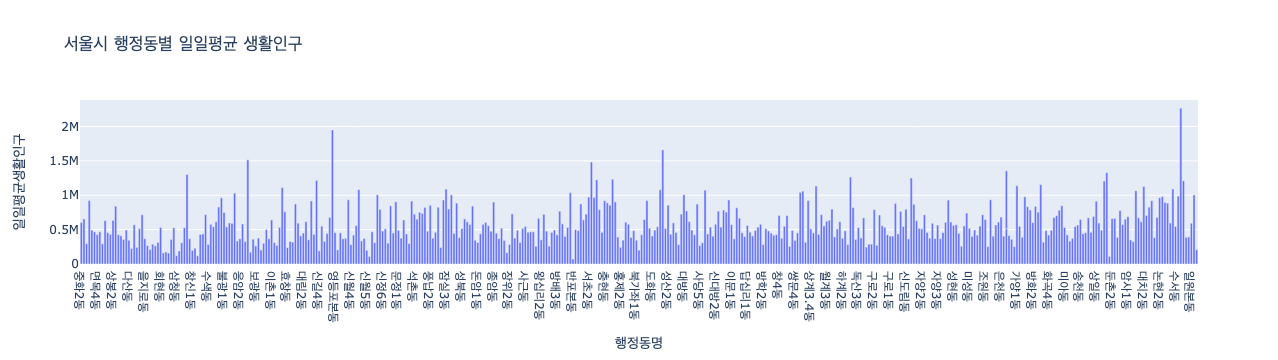

In [65]:
fig_dong_day = px.bar(
    df_dong_day, 
    x=df_dong_day.행정동명, 
    y=df_dong_day.일일평균생활인구, 
    hover_data=[df_dong_day.행정동명, df_dong_day.일일평균생활인구],
    title='서울시 행정동별 일일평균 생활인구'
)
fig_dong_day.show()

## 구별 일일생황평균

In [10]:
df_gu_day = df_dong.pivot_table("일일평균생활인구", index="시군구명",aggfunc = 'mean').sort_values(by=["일일평균생활인구"],ascending=False)
df_gu_day.reset_index(inplace=True)
df_gu_day

,시군구명,일일평균생활인구
0,강남구,"840,690"
1,서초구,"719,204"
2,강동구,"670,789"
3,마포구,"660,472"
4,송파구,"657,018"
5,은평구,"652,788"
6,강서구,"646,336"
7,노원구,"633,237"
8,영등포구,"610,087"
9,구로구,"609,695"


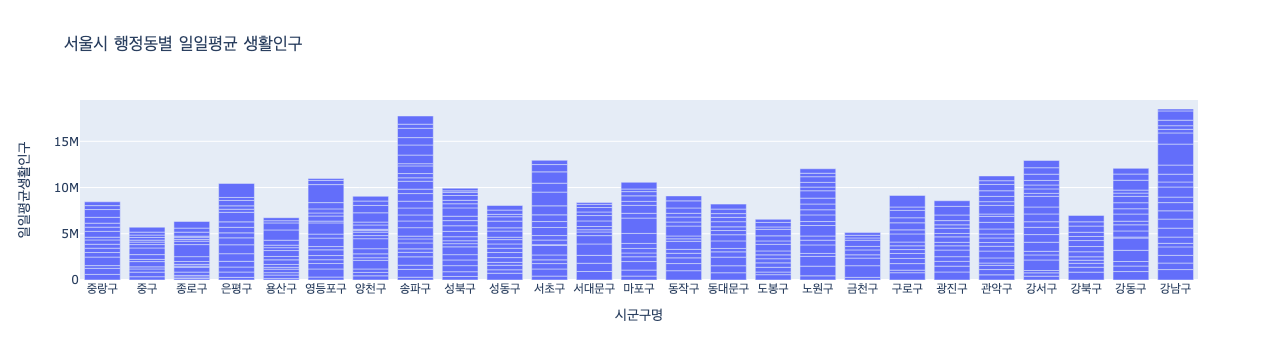

In [85]:
fig_dong_day = px.bar(
    df_dong_day, 
    x=df_dong_day.시군구명, 
    y=df_dong_day.일일평균생활인구, 
    hover_data=[df_dong_day.행정동명, df_dong_day.일일평균생활인구],
    # color='행정동명',
    title='서울시 행정동별 일일평균 생활인구'
)
fig_dong_day.show()

## 동별 일일생황평균 (평일, 주말)

In [74]:
df_dong_day2 = df_dong.pivot_table("일일평균생활인구", index=["시군구명","행정동명", "주말여부"],aggfunc = 'mean').sort_values(by=["시군구명"],ascending=False)
df_dong_day2

일일평균생활인구
시군구명 행정동명 주말여부          
중랑구  중화2동 평일     584,592
     면목본동 평일     642,250
     망우3동 주말     299,977
          평일     290,882
     망우본동 주말     942,548
...                  ...
강남구  신사동  주말     781,328
     수서동  평일     583,681
          주말     505,270
     세곡동  평일   1,095,351
     개포1동 주말     203,157

[848 rows x 1 columns]

In [ ]:
import plotly.graph_objects as go

fig_dong_day2 = go.Figure()

fig_dong_day2.add_trace(go.Bar(
  x = df_dong_day2.,
  y = df_dong_day2.일일평균생활인구,
  name = "평일",
))

fig_dong_day2.add_trace(go.Bar(
  x = [['First', 'First', 'Second', 'Second'],
       ["A", "B", "A", "B"]],
  y = [8, 3, 6, 5],
  name = "Children",
))

fig_dong_day2.update_layout(title_text="Multi-category axis")

fig_dong_day2.show()

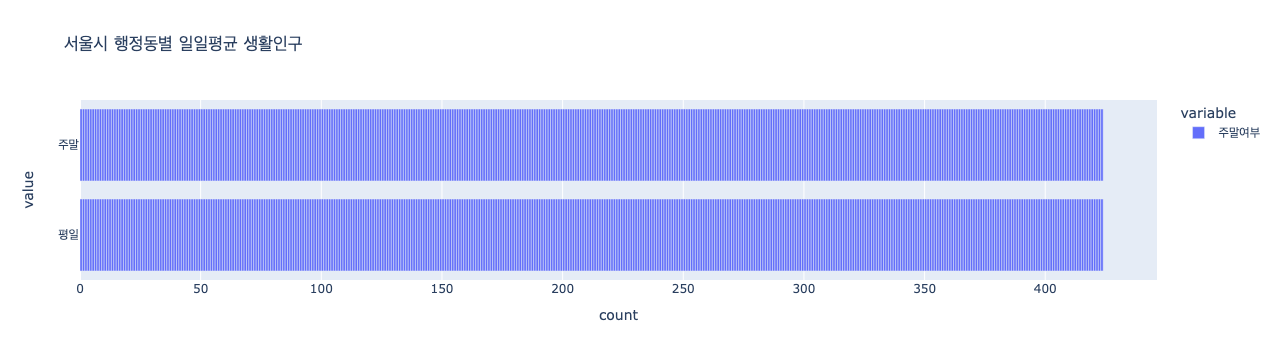

In [73]:
fig_dong_day2 = px.bar(
    df_dong_day2, 
    x=[df_dong_day2.행정동명, df_dong_day2.주말여부],
    y=df_dong_day2.일일평균생활인구, 
    hover_data=[df_dong_day2.행정동명, df_dong_day2.일일평균생활인구],
    title='서울시 행정동별 일일평균 생활인구'
)
fig_dong_day2.show()

In [60]:
df_gu_day2 = df_dong.pivot_table("일일평균생활인구", index=["시군구명", "주말여부"],aggfunc = 'mean').sort_values(by=["시군구명"],ascending=False)
df_gu_day2

일일평균생활인구
시군구명 주말여부          
중랑구  평일     517,371
     주말     539,697
중구   평일     443,131
     주말     318,171
종로구  평일     402,900
     주말     341,775
은평구  평일     638,416
     주말     667,161
용산구  평일     426,546
     주말     415,802
영등포구 평일     640,926
     주말     579,249
양천구  평일     496,500
     주말     509,489
송파구  평일     660,295
     주말     653,740
성북구  평일     494,476
     주말     498,487
성동구  평일     490,790
     주말     457,117
서초구  평일     770,468
     주말     667,941
서대문구 주말     582,436
     평일     615,901
마포구  평일     670,712
     주말     650,233
동작구  평일     604,223
     주말     608,518
동대문구 평일     592,987
     주말     579,532
도봉구  평일     458,840
     주말     479,255
노원구  평일     625,665
     주말     640,809
금천구  주말     480,413
     평일     544,826
구로구  주말     600,836
     평일     618,553
광진구  평일     567,495
     주말     575,463
관악구  평일     527,894
     주말     543,827
강서구  평일     648,086
     주말     644,586
강북구  평일     526,983
     주말     547,722
강동구  주말     675,994
     평일     665,583
강남구  평일     916,712
     주말     764,668

In [61]:
fig_gu_day2 = px.bar(
    df_gu_day2, 
    x=df_gu_day2.시군구명,
    y=df_gu_day2.일일평균생활인구, 
    hover_data=[df_gu_day.시군구명, df_gu_day.일일평균생활인구],
    barmode="group", 
    facet_col="주말여부",
    title='서울시 구별 일일평균 생활인구 (주말, 평균)', # Title
    category_orders={"주말여부": ["평일", "주말"],
                              }
)
fig_gu_day2.show()

AttributeError: 'DataFrame' object has no attribute '시군구명'

# 순위 분석 : 각 평균에 따른 합 비교

In [12]:
age_lp=df_dong.filter(regex='\d|시군구명|행정동명')
age_lp

,시군구명,행정동명,10세 이하,10대,20대,30대,40대,50대,60대,70세 이상
0,종로구,청운효자동,"26,955","38,784","66,230","65,100","75,640","61,493","37,481","47,175"
1,종로구,청운효자동,"31,123","48,128","59,397","63,722","77,525","63,144","37,586","46,827"
2,종로구,청운효자동,"28,148","39,454","73,439","68,469","76,793","64,780","38,666","47,570"
3,종로구,청운효자동,"32,101","48,700","66,507","66,928","78,406","64,761","38,537","47,020"
4,종로구,청운효자동,"26,925","38,101","61,724","59,425","72,048","60,489","37,347","46,520"
...,...,...,...,...,...,...,...,...,...,...
10171,강동구,둔촌2동,"57,326","65,695","74,560","90,769","96,631","98,122","83,208","90,596"
10172,강동구,둔촌2동,"52,924","61,990","72,190","87,278","95,048","98,348","80,474","81,892"
10173,강동구,둔촌2동,"56,665","65,880","73,829","90,282","96,577","99,279","81,680","90,703"
10174,강동구,둔촌2동,"54,678","62,292","70,108","87,657","96,831","98,176","81,164","82,762"


# 구별 1위

In [39]:
a=age_lp.groupby(["시군구명"]).mean()
a["1위"]=a.idxmax(axis=1)
a.reset_index(inplace=True)
a

,시군구명,10세 이하,10대,20대,30대,40대,50대,60대,70세 이상,1위
0,강남구,"54,254","92,351","127,204","157,530","162,132","110,881","71,024","65,314",40대
1,강동구,"54,031","66,405","77,218","103,552","112,282","100,201","81,424","75,676",40대
2,강북구,"33,712","43,803","72,687","69,291","81,524","86,376","67,683","82,275",50대
3,강서구,"50,158","52,301","90,255","119,548","107,529","87,336","70,219","68,990",30대
4,관악구,"25,997","35,698","122,214","100,193","77,268","67,670","51,539","55,281",20대
5,광진구,"35,428","50,372","110,536","95,629","88,058","81,927","57,576","51,952",20대
6,구로구,"46,767","46,459","79,445","105,246","104,207","92,370","69,968","65,233",30대
7,금천구,"26,400","29,964","81,236","98,671","86,054","82,559","58,409","49,327",30대
8,노원구,"47,626","77,712","83,965","78,244","97,800","96,669","73,296","77,925",40대
9,도봉구,"32,428","42,002","55,881","61,086","69,264","75,935","64,009","68,441",50대


In [45]:
fig_a = px.density_heatmap(
    a, 
    x=a.시군구명, 
    y=a[['10세 이하', '10대', '20대', '30대', '40대', '50대', '60대', '70세 이상']], 
    hover_data=[a.시군구명, a[['10세 이하', '10대', '20대', '30대', '40대', '50대', '60대', '70세 이상']]],
    title='서울시 구별 일일평균 생활인구 1위'
)
fig_a.show()

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

# 구별 모든 순위


In [14]:
a=age_lp.groupby(["시군구명"]).mean()
a_list=a.apply(np.argsort,axis=1)
a_cols=a.columns.to_numpy()[a_list.values[:,::-1]]
a[['1위','2위','3위','4위','5위','6위','7위','8위']]=pd.DataFrame(a_cols, index=a.index)
a

,10세 이하,10대,20대,30대,40대,50대,60대,70세 이상,1위,2위,3위,4위,5위,6위,7위,8위
시군구명,,,,,,,,,,,,,,,,
강남구,"54,254","92,351","127,204","157,530","162,132","110,881","71,024","65,314",40대,30대,20대,50대,10대,60대,70세 이상,10세 이하
강동구,"54,031","66,405","77,218","103,552","112,282","100,201","81,424","75,676",40대,30대,50대,60대,20대,70세 이상,10대,10세 이하
강북구,"33,712","43,803","72,687","69,291","81,524","86,376","67,683","82,275",50대,70세 이상,40대,20대,30대,60대,10대,10세 이하
강서구,"50,158","52,301","90,255","119,548","107,529","87,336","70,219","68,990",30대,40대,20대,50대,60대,70세 이상,10대,10세 이하
관악구,"25,997","35,698","122,214","100,193","77,268","67,670","51,539","55,281",20대,30대,40대,50대,70세 이상,60대,10대,10세 이하
광진구,"35,428","50,372","110,536","95,629","88,058","81,927","57,576","51,952",20대,30대,40대,50대,60대,70세 이상,10대,10세 이하
구로구,"46,767","46,459","79,445","105,246","104,207","92,370","69,968","65,233",30대,40대,50대,20대,60대,70세 이상,10세 이하,10대
금천구,"26,400","29,964","81,236","98,671","86,054","82,559","58,409","49,327",30대,40대,50대,20대,60대,70세 이상,10대,10세 이하
노원구,"47,626","77,712","83,965","78,244","97,800","96,669","73,296","77,925",40대,50대,20대,30대,70세 이상,10대,60대,10세 이하


# 행정동별 1위


In [15]:
a=age_lp.groupby(["시군구명","행정동명"]).mean()
a["1위"]=a.idxmax(axis=1)
a

10세 이하    10대     20대     30대     40대     50대     60대  70세 이상   1위
시군구명 행정동명                                                                    
강남구  개포1동  17,540 22,877  16,668  29,373  39,909  32,293  25,548  23,582  40대
     개포2동  44,411 90,693  55,632  68,767 109,744  91,002  67,523  67,893  40대
     개포4동  27,023 40,258  44,466  62,266  67,303  61,981  44,894  33,748  40대
     논현1동  25,207 39,173 226,528 257,413 185,112 114,170  70,034  62,174  30대
     논현2동  43,829 46,364 178,802 243,296 198,869 119,037  67,817  66,808  30대
...           ...    ...     ...     ...     ...     ...     ...     ...  ...
중랑구  상봉2동  25,514 29,881 119,234 125,717  93,236 103,448  73,681  63,497  30대
     신내1동  90,587 79,908  91,447 114,561 130,306 131,412 103,762  99,518  50대
     신내2동  30,597 41,999  46,413  60,160  61,858  68,746  56,253  59,174  50대
     중화1동  36,916 34,735  50,751  61,848  56,506  62,661  52,592  54,053  50대
     중화2동  33,945 35,518  77,749  89,685  86,840 107,091  85,851  88,029  50대

[424 rows x 9 columns]

# 행정동별 모든 순위

In [16]:
a=age_lp.groupby(["시군구명","행정동명"]).mean()
a_list=a.apply(np.argsort,axis=1)
a_cols=a.columns.to_numpy()[a_list.values[:,::-1]]
a[['1위','2위','3위','4위','5위','6위','7위','8위']]=pd.DataFrame(a_cols, index=a.index)
a

10세 이하    10대     20대     30대     40대     50대     60대  70세 이상   1위  \
시군구명 행정동명                                                                       
강남구  개포1동  17,540 22,877  16,668  29,373  39,909  32,293  25,548  23,582  40대   
     개포2동  44,411 90,693  55,632  68,767 109,744  91,002  67,523  67,893  40대   
     개포4동  27,023 40,258  44,466  62,266  67,303  61,981  44,894  33,748  40대   
     논현1동  25,207 39,173 226,528 257,413 185,112 114,170  70,034  62,174  30대   
     논현2동  43,829 46,364 178,802 243,296 198,869 119,037  67,817  66,808  30대   
...           ...    ...     ...     ...     ...     ...     ...     ...  ...   
중랑구  상봉2동  25,514 29,881 119,234 125,717  93,236 103,448  73,681  63,497  30대   
     신내1동  90,587 79,908  91,447 114,561 130,306 131,412 103,762  99,518  50대   
     신내2동  30,597 41,999  46,413  60,160  61,858  68,746  56,253  59,174  50대   
     중화1동  36,916 34,735  50,751  61,848  56,506  62,661  52,592  54,053  50대   
     중화2동  33,945 35,518  77,749  89,685  86,840 107,091  85,851  88,029  50대   

            2위      3위      4위      5위      6위      7위      8위  
시군구명 행정동명                                                       
강남구  개포1동  50대     30대     60대  70세 이상     10대  10세 이하     20대  
     개포2동  50대     10대     30대  70세 이상     60대     20대  10세 이하  
     개포4동  30대     50대     60대     20대     10대  70세 이상  10세 이하  
     논현1동  20대     40대     50대     60대  70세 이상     10대  10세 이하  
     논현2동  40대     20대     50대     60대  70세 이상     10대  10세 이하  
...        ...     ...     ...     ...     ...     ...     ...  
중랑구  상봉2동  20대     50대     40대     60대  70세 이상     10대  10세 이하  
     신내1동  40대     30대     60대  70세 이상     20대  10세 이하     10대  
     신내2동  40대     30대  70세 이상     60대     20대     10대  10세 이하  
     중화1동  30대     40대  70세 이상     60대     20대  10세 이하     10대  
     중화2동  30대  70세 이상     40대     60대     20대     10대  10세 이하  

[424 rows x 16 columns]

# 지도 시각화

In [17]:
import folium
import json

In [18]:
center = [37.541, 126.986]
tiles = ['cartodbpositron', 'Stamen Toner', 'OpenStreetMap']

In [25]:
m = folium.Map(
    location = [center[0], center[1]],
    zoom_start = 11,
    tiles = tiles[0]
)

In [26]:
geo_json = json.load(open("./hangjeongdong_서울특별시.geojson"))

In [77]:
folium.GeoJson(
    geo_json,
    name = '행정동',
    style_function = lambda x: {'fillColor':'#00000000' ,
                                'color':'black',
                                'weight' :'1'}
).add_to(m)

In [78]:
m

In [79]:
geo_json['features'][0]['properties']

{'OBJECTID': 1,
 'adm_nm': '서울특별시 종로구 사직동',
 'adm_cd': '1101053',
 'adm_cd2': '1111053000',
 'sgg': '11110',
 'sido': '11',
 'sidonm': '서울특별시',
 'sggnm': '종로구'}

In [32]:
# Initialize the map:
center = [37.541, 126.966]
tiles = ['cartodbpositron', 'Stamen Toner', 'OpenStreetMap']

# visualization ---- 2.
m = folium.Map(
    location = [center[0], center[1]],
    zoom_start = 11,
    tiles = tiles[0]
)
m.choropleth(
    geo_data=geo_json,
    name='일일평균생활인구',
    data=df_dong,
    columns=['통계청행정동코드', '일일평균생활인구'],
    key_on='feature.properties.adm_cd',
    # fill_color='YlGn',
    fill_opacity=0.3,
    line_opacity=0.7,
    color = 'PuRd', #puRd, YlGnBu',
    legend_name = '일일평균생활인구'
)

folium.LayerControl().add_to(m)
m
# Save to html
# m.save('folium_kr.html')
# webbrowser.open_new("folium_kr.html")